In [27]:
import numpy as np
from keras.applications import InceptionV3,VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
import matplotlib.pyplot as plt

Size = 128
EPOCHS = {0.001 : 50,0.0001 : 100,0.00001 : 150}

In [12]:
EPOCHS[LR]

50

# En utilisant InceptionV3

# InceptionV3 - l2 = 0.01   - learning_rate = 0.001   - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
19/19 [==============================] - 18s 482ms/step - loss: 1.6858 - accuracy: 0.4324 - val_loss: 1.9286 - val_accuracy: 0.4306
Epoch 2/50
19/19 [==============================] - 6s 323ms/step - loss: 1.3821 - accuracy: 0.5135 - val_loss: 1.6751 - val_accuracy: 0.3889
Epoch 3/50
19/19 [==============================] - 6s 321ms/step - loss: 1.1322 - accuracy: 0.5608 - val_loss: 1.2397 - val_accuracy: 0.5139
Epoch 4/50
19/19 [==============================] - 6s 332ms/step - loss: 0.9790 - accuracy: 0.6757 - val_loss: 1.5261 - val_accuracy: 0.5278
Epoch 5/50
19/19 [==============================] - 6s 322ms/step - loss: 0.7440 - accuracy: 0.7297 - val_loss: 1.2629 - val_accuracy: 0.5000
Epoch 6/50
19/19 [==============================] - 6s 318ms/step - loss: 0.6644 - accuracy: 0.7500 - val_loss: 1.3287 - val_accuracy: 0.4167
Epoch 7/50
19/19 [========

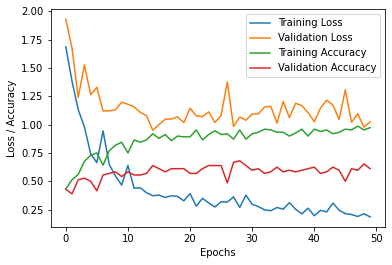

9/9 [==============================] - 2s 196ms/step - loss: 1.3116 - accuracy: 0.6250
Test loss: 1.3116247653961182
Test accuracy: 0.625


In [15]:
L2R = 0.01;LR = 0.001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.01   - learning_rate = 0.001   - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
39/39 [==============================] - 19s 252ms/step - loss: 2.2022 - accuracy: 0.4038 - val_loss: 1.7677 - val_accuracy: 0.5278
Epoch 2/50
39/39 [==============================] - 7s 170ms/step - loss: 1.9516 - accuracy: 0.4936 - val_loss: 1.6500 - val_accuracy: 0.4444
Epoch 3/50
39/39 [==============================] - 7s 173ms/step - loss: 1.0866 - accuracy: 0.5769 - val_loss: 2.0540 - val_accuracy: 0.4167
Epoch 4/50
39/39 [==============================] - 7s 171ms/step - loss: 0.9549 - accuracy: 0.6474 - val_loss: 1.1828 - val_accuracy: 0.6111
Epoch 5/50
39/39 [==============================] - 7s 170ms/step - loss: 0.8193 - accuracy: 0.7115 - val_loss: 1.4070 - val_accuracy: 0.5278
Epoch 6/50
39/39 [==============================] - 7s 174ms/step - loss: 0.8964 - accuracy: 0.7051 - val_loss: 1.3098 - val_accuracy: 0.5556
Epoch 7/50
39/39 [========

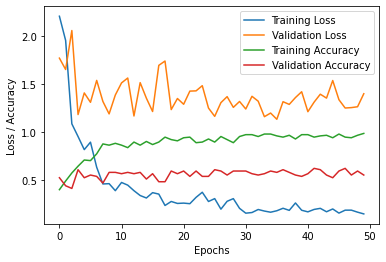

18/18 [==============================] - 2s 110ms/step - loss: 1.6972 - accuracy: 0.6111
Test loss: 1.697191834449768
Test accuracy: 0.6111111044883728


In [16]:
L2R = 0.01;LR = 0.001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.01   - learning_rate = 0.0001  - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
19/19 [==============================] - 17s 463ms/step - loss: 1.6922 - accuracy: 0.3581 - val_loss: 1.4537 - val_accuracy: 0.4028
Epoch 2/100
19/19 [==============================] - 6s 311ms/step - loss: 1.4597 - accuracy: 0.3851 - val_loss: 1.3381 - val_accuracy: 0.4028
Epoch 3/100
19/19 [==============================] - 6s 312ms/step - loss: 1.2874 - accuracy: 0.4122 - val_loss: 1.3395 - val_accuracy: 0.4167
Epoch 4/100
19/19 [==============================] - 6s 308ms/step - loss: 1.2719 - accuracy: 0.4189 - val_loss: 1.2666 - val_accuracy: 0.4583
Epoch 5/100
19/19 [==============================] - 6s 310ms/step - loss: 1.1467 - accuracy: 0.5068 - val_loss: 1.2451 - val_accuracy: 0.5139
Epoch 6/100
19/19 [==============================] - 6s 308ms/step - loss: 1.1475 - accuracy: 0.5135 - val_loss: 1.2305 - val_accuracy: 0.4444
Epoch 7/100
19/19 [=

19/19 [==============================] - 6s 318ms/step - loss: 0.5179 - accuracy: 0.8158 - val_loss: 1.0534 - val_accuracy: 0.5417
Epoch 58/100
19/19 [==============================] - 6s 309ms/step - loss: 0.5633 - accuracy: 0.8243 - val_loss: 1.0151 - val_accuracy: 0.5694
Epoch 59/100
19/19 [==============================] - 6s 311ms/step - loss: 0.5497 - accuracy: 0.8108 - val_loss: 1.0392 - val_accuracy: 0.5417
Epoch 60/100
19/19 [==============================] - 6s 304ms/step - loss: 0.4734 - accuracy: 0.8716 - val_loss: 1.0269 - val_accuracy: 0.5417
Epoch 61/100
19/19 [==============================] - 6s 313ms/step - loss: 0.5492 - accuracy: 0.8041 - val_loss: 1.0274 - val_accuracy: 0.5417
Epoch 62/100
19/19 [==============================] - 6s 307ms/step - loss: 0.5149 - accuracy: 0.8108 - val_loss: 1.0093 - val_accuracy: 0.5833
Epoch 63/100
19/19 [==============================] - 6s 311ms/step - loss: 0.4866 - accuracy: 0.8514 - val_loss: 0.9896 - val_accuracy: 0.5833
Epoch

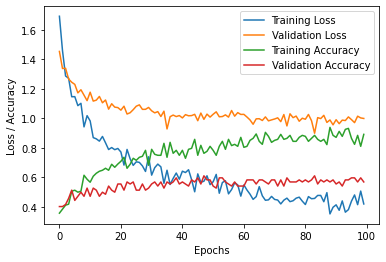

9/9 [==============================] - 2s 181ms/step - loss: 1.1104 - accuracy: 0.6389
Test loss: 1.1104342937469482
Test accuracy: 0.6388888955116272


In [17]:
L2R = 0.01;LR = 0.0001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.01   - learning_rate = 0.0001  - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
39/39 [==============================] - 18s 243ms/step - loss: 1.5610 - accuracy: 0.3590 - val_loss: 1.5394 - val_accuracy: 0.2917
Epoch 2/100
39/39 [==============================] - 6s 164ms/step - loss: 1.4285 - accuracy: 0.4038 - val_loss: 1.4168 - val_accuracy: 0.4028
Epoch 3/100
39/39 [==============================] - 6s 163ms/step - loss: 1.3655 - accuracy: 0.3782 - val_loss: 1.3786 - val_accuracy: 0.3750
Epoch 4/100
39/39 [==============================] - 6s 165ms/step - loss: 1.2146 - accuracy: 0.5256 - val_loss: 1.3410 - val_accuracy: 0.3750
Epoch 5/100
39/39 [==============================] - 6s 164ms/step - loss: 1.1595 - accuracy: 0.5256 - val_loss: 1.2666 - val_accuracy: 0.4306
Epoch 6/100
39/39 [==============================] - 6s 162ms/step - loss: 1.0169 - accuracy: 0.5705 - val_loss: 1.2633 - val_accuracy: 0.4444
Epoch 7/100
39/39 [=

39/39 [==============================] - 6s 163ms/step - loss: 0.4424 - accuracy: 0.8654 - val_loss: 1.1089 - val_accuracy: 0.5417
Epoch 58/100
39/39 [==============================] - 6s 165ms/step - loss: 0.3939 - accuracy: 0.8846 - val_loss: 1.1201 - val_accuracy: 0.5556
Epoch 59/100
39/39 [==============================] - 6s 165ms/step - loss: 0.4052 - accuracy: 0.8654 - val_loss: 1.1588 - val_accuracy: 0.5417
Epoch 60/100
39/39 [==============================] - 6s 161ms/step - loss: 0.3831 - accuracy: 0.9038 - val_loss: 1.0802 - val_accuracy: 0.5556
Epoch 61/100
39/39 [==============================] - 6s 163ms/step - loss: 0.3972 - accuracy: 0.8974 - val_loss: 1.0920 - val_accuracy: 0.5278
Epoch 62/100
39/39 [==============================] - 7s 168ms/step - loss: 0.4545 - accuracy: 0.8397 - val_loss: 1.1206 - val_accuracy: 0.5556
Epoch 63/100
39/39 [==============================] - 7s 168ms/step - loss: 0.3783 - accuracy: 0.9038 - val_loss: 1.1609 - val_accuracy: 0.5694
Epoch

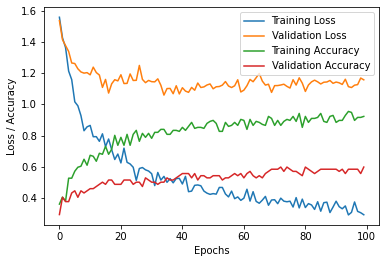

18/18 [==============================] - 2s 106ms/step - loss: 1.2392 - accuracy: 0.5417
Test loss: 1.239223599433899
Test accuracy: 0.5416666865348816


In [18]:
L2R = 0.01;LR = 0.0001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.01   - learning_rate = 0.00001 - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
19/19 [==============================] - 17s 467ms/step - loss: 1.8645 - accuracy: 0.3986 - val_loss: 1.6780 - val_accuracy: 0.4028
Epoch 2/150
19/19 [==============================] - 6s 315ms/step - loss: 1.6910 - accuracy: 0.3581 - val_loss: 1.6448 - val_accuracy: 0.3472
Epoch 3/150
19/19 [==============================] - 6s 307ms/step - loss: 1.4829 - accuracy: 0.3986 - val_loss: 1.5846 - val_accuracy: 0.3194
Epoch 4/150
19/19 [==============================] - 6s 310ms/step - loss: 1.6162 - accuracy: 0.3311 - val_loss: 1.5126 - val_accuracy: 0.3611
Epoch 5/150
19/19 [==============================] - 6s 317ms/step - loss: 1.4546 - accuracy: 0.3618 - val_loss: 1.4562 - val_accuracy: 0.4028
Epoch 6/150
19/19 [==============================] - 6s 312ms/step - loss: 1.4266 - accuracy: 0.3716 - val_loss: 1.5096 - val_accuracy: 0.3750
Epoch 7/150
19/19 [=

19/19 [==============================] - 6s 306ms/step - loss: 1.1073 - accuracy: 0.5270 - val_loss: 1.2856 - val_accuracy: 0.4444
Epoch 58/150
19/19 [==============================] - 6s 311ms/step - loss: 1.1057 - accuracy: 0.5541 - val_loss: 1.2788 - val_accuracy: 0.4444
Epoch 59/150
19/19 [==============================] - 6s 313ms/step - loss: 1.1306 - accuracy: 0.5068 - val_loss: 1.2468 - val_accuracy: 0.4722
Epoch 60/150
19/19 [==============================] - 6s 314ms/step - loss: 1.1105 - accuracy: 0.4865 - val_loss: 1.2630 - val_accuracy: 0.4583
Epoch 61/150
19/19 [==============================] - 6s 308ms/step - loss: 1.1116 - accuracy: 0.5000 - val_loss: 1.2391 - val_accuracy: 0.4861
Epoch 62/150
19/19 [==============================] - 6s 310ms/step - loss: 1.1694 - accuracy: 0.4932 - val_loss: 1.2588 - val_accuracy: 0.4583
Epoch 63/150
19/19 [==============================] - 6s 309ms/step - loss: 1.1296 - accuracy: 0.5135 - val_loss: 1.2363 - val_accuracy: 0.4583
Epoch

Epoch 114/150
19/19 [==============================] - 3s 175ms/step - loss: 0.9638 - accuracy: 0.5811 - val_loss: 1.1507 - val_accuracy: 0.5000
Epoch 115/150
19/19 [==============================] - 3s 173ms/step - loss: 0.9588 - accuracy: 0.6149 - val_loss: 1.1497 - val_accuracy: 0.5000
Epoch 116/150
19/19 [==============================] - 3s 175ms/step - loss: 1.0038 - accuracy: 0.5608 - val_loss: 1.1352 - val_accuracy: 0.5000
Epoch 117/150
19/19 [==============================] - 3s 174ms/step - loss: 1.0367 - accuracy: 0.5541 - val_loss: 1.1265 - val_accuracy: 0.5139
Epoch 118/150
19/19 [==============================] - 3s 174ms/step - loss: 0.9254 - accuracy: 0.6419 - val_loss: 1.1275 - val_accuracy: 0.5000
Epoch 119/150
19/19 [==============================] - 3s 177ms/step - loss: 1.0211 - accuracy: 0.5676 - val_loss: 1.1498 - val_accuracy: 0.4861
Epoch 120/150
19/19 [==============================] - 3s 174ms/step - loss: 0.8864 - accuracy: 0.6419 - val_loss: 1.1525 - val_ac

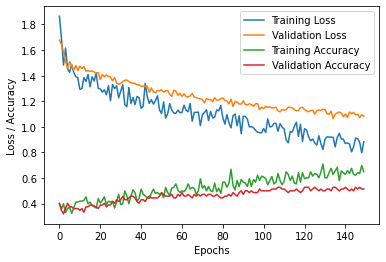

9/9 [==============================] - 1s 128ms/step - loss: 1.1974 - accuracy: 0.5278
Test loss: 1.197421908378601
Test accuracy: 0.5277777910232544


In [19]:
L2R = 0.01;LR = 0.00001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.01   - learning_rate = 0.00001 - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
39/39 [==============================] - 9s 137ms/step - loss: 1.6555 - accuracy: 0.3141 - val_loss: 1.7681 - val_accuracy: 0.2917
Epoch 2/150
39/39 [==============================] - 4s 115ms/step - loss: 1.6445 - accuracy: 0.3333 - val_loss: 1.7009 - val_accuracy: 0.3056
Epoch 3/150
39/39 [==============================] - 4s 115ms/step - loss: 1.5720 - accuracy: 0.3654 - val_loss: 1.6614 - val_accuracy: 0.2917
Epoch 4/150
39/39 [==============================] - 4s 114ms/step - loss: 1.4461 - accuracy: 0.4359 - val_loss: 1.6353 - val_accuracy: 0.3194
Epoch 5/150
39/39 [==============================] - 4s 110ms/step - loss: 1.4865 - accuracy: 0.3846 - val_loss: 1.5959 - val_accuracy: 0.3333
Epoch 6/150
39/39 [==============================] - 4s 110ms/step - loss: 1.4130 - accuracy: 0.3910 - val_loss: 1.5439 - val_accuracy: 0.3611
Epoch 7/150
39/39 [==

39/39 [==============================] - 4s 111ms/step - loss: 1.0219 - accuracy: 0.5641 - val_loss: 1.2455 - val_accuracy: 0.4861
Epoch 58/150
39/39 [==============================] - 4s 110ms/step - loss: 0.9028 - accuracy: 0.6410 - val_loss: 1.2461 - val_accuracy: 0.4861
Epoch 59/150
39/39 [==============================] - 4s 109ms/step - loss: 0.8863 - accuracy: 0.6090 - val_loss: 1.2386 - val_accuracy: 0.4722
Epoch 60/150
39/39 [==============================] - 4s 109ms/step - loss: 0.9669 - accuracy: 0.5962 - val_loss: 1.2269 - val_accuracy: 0.5000
Epoch 61/150
39/39 [==============================] - 4s 110ms/step - loss: 0.9015 - accuracy: 0.6154 - val_loss: 1.2260 - val_accuracy: 0.5000
Epoch 62/150
39/39 [==============================] - 4s 110ms/step - loss: 0.9449 - accuracy: 0.6026 - val_loss: 1.1750 - val_accuracy: 0.5139
Epoch 63/150
39/39 [==============================] - 4s 110ms/step - loss: 0.9987 - accuracy: 0.5897 - val_loss: 1.2225 - val_accuracy: 0.4722
Epoch

Epoch 114/150
39/39 [==============================] - 4s 111ms/step - loss: 0.8003 - accuracy: 0.6346 - val_loss: 1.1486 - val_accuracy: 0.5000
Epoch 115/150
39/39 [==============================] - 4s 110ms/step - loss: 0.7516 - accuracy: 0.6859 - val_loss: 1.1846 - val_accuracy: 0.4861
Epoch 116/150
39/39 [==============================] - 4s 110ms/step - loss: 0.7256 - accuracy: 0.7179 - val_loss: 1.1852 - val_accuracy: 0.4861
Epoch 117/150
39/39 [==============================] - 4s 109ms/step - loss: 0.7234 - accuracy: 0.7179 - val_loss: 1.1380 - val_accuracy: 0.5139
Epoch 118/150
39/39 [==============================] - 4s 109ms/step - loss: 0.7049 - accuracy: 0.7500 - val_loss: 1.1532 - val_accuracy: 0.5139
Epoch 119/150
39/39 [==============================] - 4s 110ms/step - loss: 0.6832 - accuracy: 0.7692 - val_loss: 1.1785 - val_accuracy: 0.4861
Epoch 120/150
39/39 [==============================] - 4s 110ms/step - loss: 0.7508 - accuracy: 0.7051 - val_loss: 1.1801 - val_ac

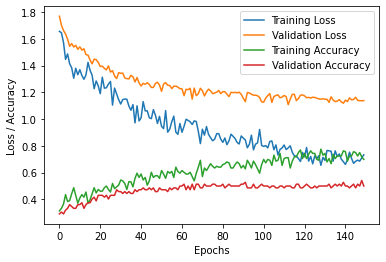

18/18 [==============================] - 1s 69ms/step - loss: 1.1325 - accuracy: 0.6111
Test loss: 1.1324734687805176
Test accuracy: 0.6111111044883728


In [20]:
L2R = 0.01;LR = 0.00001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.001   - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
19/19 [==============================] - 8s 232ms/step - loss: 1.6937 - accuracy: 0.3919 - val_loss: 1.5597 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 3s 173ms/step - loss: 1.3319 - accuracy: 0.4932 - val_loss: 0.9879 - val_accuracy: 0.5556
Epoch 3/50
19/19 [==============================] - 4s 189ms/step - loss: 0.9751 - accuracy: 0.5946 - val_loss: 1.4559 - val_accuracy: 0.5000
Epoch 4/50
19/19 [==============================] - 4s 190ms/step - loss: 0.8231 - accuracy: 0.6554 - val_loss: 1.3020 - val_accuracy: 0.5139
Epoch 5/50
19/19 [==============================] - 4s 191ms/step - loss: 0.8350 - accuracy: 0.6622 - val_loss: 1.1580 - val_accuracy: 0.5139
Epoch 6/50
19/19 [==============================] - 4s 189ms/step - loss: 0.7274 - accuracy: 0.7095 - val_loss: 1.7323 - val_accuracy: 0.4306
Epoch 7/50
19/19 [=========

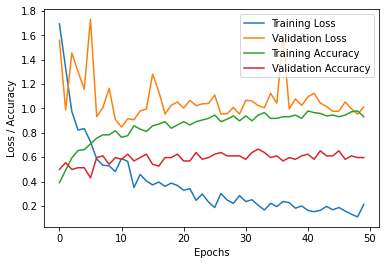

9/9 [==============================] - 1s 116ms/step - loss: 1.3677 - accuracy: 0.6528
Test loss: 1.367693543434143
Test accuracy: 0.6527777910232544


In [21]:
L2R = 0.001;LR = 0.001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.001   - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
39/39 [==============================] - 9s 133ms/step - loss: 1.7454 - accuracy: 0.4679 - val_loss: 1.5072 - val_accuracy: 0.4861
Epoch 2/50
39/39 [==============================] - 4s 105ms/step - loss: 1.1626 - accuracy: 0.6154 - val_loss: 1.8665 - val_accuracy: 0.4861
Epoch 3/50
39/39 [==============================] - 4s 113ms/step - loss: 0.8912 - accuracy: 0.6859 - val_loss: 1.1853 - val_accuracy: 0.5278
Epoch 4/50
39/39 [==============================] - 4s 113ms/step - loss: 0.9224 - accuracy: 0.6538 - val_loss: 1.1264 - val_accuracy: 0.5556
Epoch 5/50
39/39 [==============================] - 4s 113ms/step - loss: 0.6519 - accuracy: 0.7436 - val_loss: 1.4358 - val_accuracy: 0.5278
Epoch 6/50
39/39 [==============================] - 4s 113ms/step - loss: 0.5576 - accuracy: 0.7436 - val_loss: 1.0695 - val_accuracy: 0.5972
Epoch 7/50
39/39 [=========

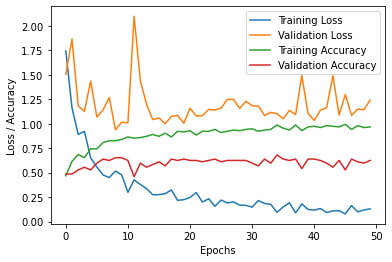

18/18 [==============================] - 1s 72ms/step - loss: 1.6481 - accuracy: 0.5278
Test loss: 1.6480658054351807
Test accuracy: 0.5277777910232544


In [22]:
L2R = 0.001;LR = 0.001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.0001  - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
19/19 [==============================] - 8s 236ms/step - loss: 1.6198 - accuracy: 0.3176 - val_loss: 1.2502 - val_accuracy: 0.4167
Epoch 2/100
19/19 [==============================] - 3s 176ms/step - loss: 1.4562 - accuracy: 0.3919 - val_loss: 1.1897 - val_accuracy: 0.4167
Epoch 3/100
19/19 [==============================] - 4s 192ms/step - loss: 1.3244 - accuracy: 0.4189 - val_loss: 1.1674 - val_accuracy: 0.4028
Epoch 4/100
19/19 [==============================] - 4s 192ms/step - loss: 1.1741 - accuracy: 0.4527 - val_loss: 1.1030 - val_accuracy: 0.4028
Epoch 5/100
19/19 [==============================] - 4s 194ms/step - loss: 1.2477 - accuracy: 0.4392 - val_loss: 1.1187 - val_accuracy: 0.4861
Epoch 6/100
19/19 [==============================] - 4s 193ms/step - loss: 1.0882 - accuracy: 0.4865 - val_loss: 1.0681 - val_accuracy: 0.4861
Epoch 7/100
19/19 [==

19/19 [==============================] - 4s 193ms/step - loss: 0.5173 - accuracy: 0.7635 - val_loss: 0.8920 - val_accuracy: 0.5972
Epoch 58/100
19/19 [==============================] - 4s 191ms/step - loss: 0.4549 - accuracy: 0.8514 - val_loss: 0.8397 - val_accuracy: 0.6111
Epoch 59/100
19/19 [==============================] - 4s 190ms/step - loss: 0.4894 - accuracy: 0.8243 - val_loss: 0.8885 - val_accuracy: 0.6111
Epoch 60/100
19/19 [==============================] - 4s 192ms/step - loss: 0.4734 - accuracy: 0.8311 - val_loss: 0.8852 - val_accuracy: 0.5972
Epoch 61/100
19/19 [==============================] - 4s 191ms/step - loss: 0.4609 - accuracy: 0.8378 - val_loss: 0.8837 - val_accuracy: 0.6250
Epoch 62/100
19/19 [==============================] - 4s 192ms/step - loss: 0.4754 - accuracy: 0.8243 - val_loss: 0.8755 - val_accuracy: 0.6111
Epoch 63/100
19/19 [==============================] - 4s 194ms/step - loss: 0.4402 - accuracy: 0.8446 - val_loss: 0.8945 - val_accuracy: 0.5694
Epoch

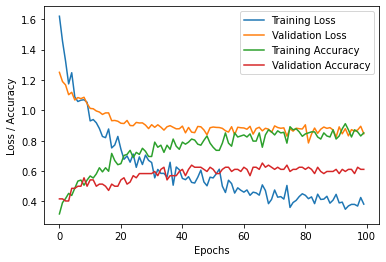

9/9 [==============================] - 1s 123ms/step - loss: 0.9205 - accuracy: 0.7222
Test loss: 0.9205235242843628
Test accuracy: 0.7222222089767456


In [23]:
L2R = 0.001;LR = 0.0001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.0001  - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
39/39 [==============================] - 9s 136ms/step - loss: 1.5092 - accuracy: 0.4167 - val_loss: 1.4406 - val_accuracy: 0.3472
Epoch 2/100
39/39 [==============================] - 4s 110ms/step - loss: 1.2477 - accuracy: 0.4359 - val_loss: 1.3692 - val_accuracy: 0.3472
Epoch 3/100
39/39 [==============================] - 5s 118ms/step - loss: 1.2117 - accuracy: 0.4872 - val_loss: 1.2503 - val_accuracy: 0.3889
Epoch 4/100
39/39 [==============================] - 5s 118ms/step - loss: 1.1671 - accuracy: 0.4808 - val_loss: 1.1954 - val_accuracy: 0.4861
Epoch 5/100
39/39 [==============================] - 5s 118ms/step - loss: 1.0413 - accuracy: 0.5769 - val_loss: 1.1553 - val_accuracy: 0.5000
Epoch 6/100
39/39 [==============================] - 5s 118ms/step - loss: 0.9873 - accuracy: 0.5449 - val_loss: 1.1815 - val_accuracy: 0.4583
Epoch 7/100
39/39 [==

39/39 [==============================] - 5s 118ms/step - loss: 0.3447 - accuracy: 0.8910 - val_loss: 0.8452 - val_accuracy: 0.5833
Epoch 58/100
39/39 [==============================] - 5s 117ms/step - loss: 0.3418 - accuracy: 0.8974 - val_loss: 0.9110 - val_accuracy: 0.6250
Epoch 59/100
39/39 [==============================] - 5s 117ms/step - loss: 0.3581 - accuracy: 0.9038 - val_loss: 0.9078 - val_accuracy: 0.6111
Epoch 60/100
39/39 [==============================] - 5s 117ms/step - loss: 0.3195 - accuracy: 0.9103 - val_loss: 0.9054 - val_accuracy: 0.6250
Epoch 61/100
39/39 [==============================] - 5s 118ms/step - loss: 0.3625 - accuracy: 0.8654 - val_loss: 0.9287 - val_accuracy: 0.5833
Epoch 62/100
39/39 [==============================] - 5s 117ms/step - loss: 0.3613 - accuracy: 0.8590 - val_loss: 0.9399 - val_accuracy: 0.5833
Epoch 63/100
39/39 [==============================] - 5s 117ms/step - loss: 0.3015 - accuracy: 0.9231 - val_loss: 0.9122 - val_accuracy: 0.5972
Epoch

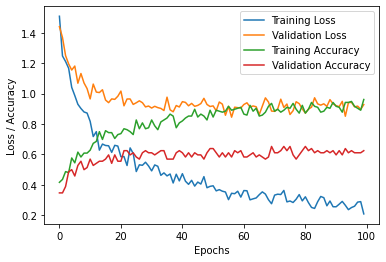

18/18 [==============================] - 2s 89ms/step - loss: 1.0440 - accuracy: 0.6806
Test loss: 1.0440077781677246
Test accuracy: 0.6805555820465088


In [24]:
L2R = 0.001;LR = 0.0001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.00001 - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
19/19 [==============================] - 9s 268ms/step - loss: 1.5121 - accuracy: 0.3851 - val_loss: 1.5641 - val_accuracy: 0.3611
Epoch 2/150
19/19 [==============================] - 4s 191ms/step - loss: 1.5674 - accuracy: 0.2973 - val_loss: 1.5877 - val_accuracy: 0.3472
Epoch 3/150
19/19 [==============================] - 4s 203ms/step - loss: 1.3851 - accuracy: 0.3378 - val_loss: 1.5536 - val_accuracy: 0.3611
Epoch 4/150
19/19 [==============================] - 4s 208ms/step - loss: 1.3860 - accuracy: 0.3649 - val_loss: 1.5371 - val_accuracy: 0.3472
Epoch 5/150
19/19 [==============================] - 4s 220ms/step - loss: 1.4497 - accuracy: 0.3378 - val_loss: 1.5224 - val_accuracy: 0.3611
Epoch 6/150
19/19 [==============================] - 4s 222ms/step - loss: 1.3612 - accuracy: 0.4054 - val_loss: 1.5283 - val_accuracy: 0.3472
Epoch 7/150
19/19 [==

19/19 [==============================] - 4s 193ms/step - loss: 1.0901 - accuracy: 0.4459 - val_loss: 1.1888 - val_accuracy: 0.4722
Epoch 58/150
19/19 [==============================] - 4s 194ms/step - loss: 0.9719 - accuracy: 0.5541 - val_loss: 1.1684 - val_accuracy: 0.5000
Epoch 59/150
19/19 [==============================] - 4s 195ms/step - loss: 0.9866 - accuracy: 0.5405 - val_loss: 1.1980 - val_accuracy: 0.5000
Epoch 60/150
19/19 [==============================] - 4s 194ms/step - loss: 0.9463 - accuracy: 0.5811 - val_loss: 1.1849 - val_accuracy: 0.4861
Epoch 61/150
19/19 [==============================] - 4s 194ms/step - loss: 1.0724 - accuracy: 0.5338 - val_loss: 1.1596 - val_accuracy: 0.5139
Epoch 62/150
19/19 [==============================] - 4s 194ms/step - loss: 1.0726 - accuracy: 0.5338 - val_loss: 1.1973 - val_accuracy: 0.4861
Epoch 63/150
19/19 [==============================] - 4s 194ms/step - loss: 1.0458 - accuracy: 0.5135 - val_loss: 1.2110 - val_accuracy: 0.4722
Epoch

Epoch 114/150
19/19 [==============================] - 4s 194ms/step - loss: 0.8644 - accuracy: 0.6216 - val_loss: 1.1082 - val_accuracy: 0.5278
Epoch 115/150
19/19 [==============================] - 4s 194ms/step - loss: 0.8529 - accuracy: 0.6351 - val_loss: 1.1080 - val_accuracy: 0.5278
Epoch 116/150
19/19 [==============================] - 4s 194ms/step - loss: 0.8853 - accuracy: 0.6419 - val_loss: 1.0727 - val_accuracy: 0.5278
Epoch 117/150
19/19 [==============================] - 4s 195ms/step - loss: 0.8199 - accuracy: 0.6351 - val_loss: 1.0937 - val_accuracy: 0.5278
Epoch 118/150
19/19 [==============================] - 4s 193ms/step - loss: 0.8575 - accuracy: 0.6216 - val_loss: 1.1025 - val_accuracy: 0.5417
Epoch 119/150
19/19 [==============================] - 4s 194ms/step - loss: 0.8897 - accuracy: 0.6081 - val_loss: 1.1226 - val_accuracy: 0.5139
Epoch 120/150
19/19 [==============================] - 4s 195ms/step - loss: 0.8626 - accuracy: 0.6284 - val_loss: 1.0706 - val_ac

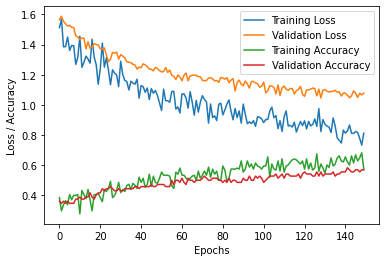

9/9 [==============================] - 1s 125ms/step - loss: 0.9697 - accuracy: 0.5694
Test loss: 0.96974778175354
Test accuracy: 0.5694444179534912


In [25]:
L2R = 0.001;LR = 0.00001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# InceptionV3 - l2 = 0.001  - learning_rate = 0.00001 - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
39/39 [==============================] - 9s 144ms/step - loss: 1.4627 - accuracy: 0.4679 - val_loss: 1.4106 - val_accuracy: 0.3611
Epoch 2/150
39/39 [==============================] - 4s 113ms/step - loss: 1.3828 - accuracy: 0.4295 - val_loss: 1.3441 - val_accuracy: 0.3750
Epoch 3/150
39/39 [==============================] - 5s 119ms/step - loss: 1.3630 - accuracy: 0.3846 - val_loss: 1.3432 - val_accuracy: 0.3750
Epoch 4/150
39/39 [==============================] - 5s 119ms/step - loss: 1.3790 - accuracy: 0.3718 - val_loss: 1.2809 - val_accuracy: 0.3750
Epoch 5/150
39/39 [==============================] - 5s 119ms/step - loss: 1.3026 - accuracy: 0.4744 - val_loss: 1.3079 - val_accuracy: 0.3750
Epoch 6/150
39/39 [==============================] - 5s 131ms/step - loss: 1.3714 - accuracy: 0.3910 - val_loss: 1.2934 - val_accuracy: 0.3889
Epoch 7/150
39/39 [==

39/39 [==============================] - 5s 122ms/step - loss: 0.8902 - accuracy: 0.6154 - val_loss: 1.0356 - val_accuracy: 0.4306
Epoch 58/150
39/39 [==============================] - 6s 144ms/step - loss: 0.9099 - accuracy: 0.5962 - val_loss: 1.0376 - val_accuracy: 0.4167
Epoch 59/150
39/39 [==============================] - 6s 144ms/step - loss: 0.8241 - accuracy: 0.6346 - val_loss: 1.0676 - val_accuracy: 0.4028
Epoch 60/150
39/39 [==============================] - 5s 126ms/step - loss: 0.8688 - accuracy: 0.6154 - val_loss: 1.0496 - val_accuracy: 0.4306
Epoch 61/150
39/39 [==============================] - 5s 123ms/step - loss: 0.8831 - accuracy: 0.6603 - val_loss: 1.0638 - val_accuracy: 0.4167
Epoch 62/150
39/39 [==============================] - 5s 131ms/step - loss: 0.9126 - accuracy: 0.6090 - val_loss: 1.0675 - val_accuracy: 0.4306
Epoch 63/150
39/39 [==============================] - 5s 139ms/step - loss: 0.7855 - accuracy: 0.6667 - val_loss: 1.0530 - val_accuracy: 0.4583
Epoch

Epoch 114/150
39/39 [==============================] - 5s 119ms/step - loss: 0.8315 - accuracy: 0.6346 - val_loss: 0.9715 - val_accuracy: 0.4722
Epoch 115/150
39/39 [==============================] - 5s 119ms/step - loss: 0.7130 - accuracy: 0.7308 - val_loss: 1.0052 - val_accuracy: 0.4444
Epoch 116/150
39/39 [==============================] - 5s 118ms/step - loss: 0.7296 - accuracy: 0.6987 - val_loss: 0.9993 - val_accuracy: 0.4722
Epoch 117/150
39/39 [==============================] - 5s 119ms/step - loss: 0.7356 - accuracy: 0.6731 - val_loss: 0.9720 - val_accuracy: 0.4722
Epoch 118/150
39/39 [==============================] - 5s 119ms/step - loss: 0.6859 - accuracy: 0.7179 - val_loss: 1.0007 - val_accuracy: 0.4722
Epoch 119/150
39/39 [==============================] - 5s 119ms/step - loss: 0.6572 - accuracy: 0.7372 - val_loss: 1.0136 - val_accuracy: 0.4444
Epoch 120/150
39/39 [==============================] - 5s 119ms/step - loss: 0.7513 - accuracy: 0.6474 - val_loss: 0.9959 - val_ac

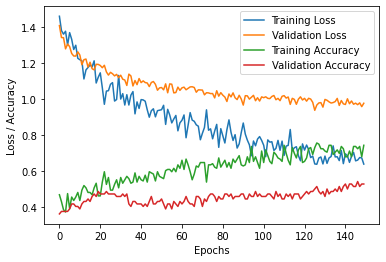

18/18 [==============================] - 1s 78ms/step - loss: 1.1629 - accuracy: 0.5417
Test loss: 1.1628899574279785
Test accuracy: 0.5416666865348816


In [26]:
L2R = 0.001;LR = 0.00001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# En utilisant VGG16

# VGG16 - l2 = 0.01   - learning_rate = 0.001   - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
19/19 [==============================] - 13s 658ms/step - loss: 1.2119 - accuracy: 0.3581 - val_loss: 1.1171 - val_accuracy: 0.4444
Epoch 2/50
19/19 [==============================] - 12s 653ms/step - loss: 1.1775 - accuracy: 0.3851 - val_loss: 1.2014 - val_accuracy: 0.3056
Epoch 3/50
19/19 [==============================] - 12s 655ms/step - loss: 1.1255 - accuracy: 0.4324 - val_loss: 1.0917 - val_accuracy: 0.4306
Epoch 4/50
19/19 [==============================] - 12s 651ms/step - loss: 1.1073 - accuracy: 0.4459 - val_loss: 1.0798 - val_accuracy: 0.4167
Epoch 5/50
19/19 [==============================] - 12s 657ms/step - loss: 1.0557 - accuracy: 0.5338 - val_loss: 1.1344 - val_accuracy: 0.4306
Epoch 6/50
19/19 [==============================] - 12s 655ms/step - loss: 0.9872 - accuracy: 0.5068 - val_loss: 1.0950 - val_accuracy: 0.4028
Epoch 7/50
19/19 [===

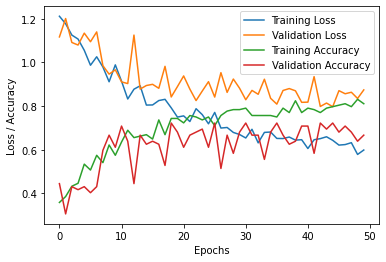

9/9 [==============================] - 4s 441ms/step - loss: 0.8953 - accuracy: 0.6667
Test loss: 0.8952887058258057
Test accuracy: 0.6666666865348816


In [40]:
L2R = 0.01;LR = 0.001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.01   - learning_rate = 0.001   - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
39/39 [==============================] - 14s 347ms/step - loss: 1.3579 - accuracy: 0.3141 - val_loss: 1.0976 - val_accuracy: 0.4306
Epoch 2/50
39/39 [==============================] - 13s 346ms/step - loss: 1.2198 - accuracy: 0.3846 - val_loss: 1.0067 - val_accuracy: 0.6111
Epoch 3/50
39/39 [==============================] - 13s 346ms/step - loss: 1.1051 - accuracy: 0.4487 - val_loss: 1.0173 - val_accuracy: 0.5000
Epoch 4/50
39/39 [==============================] - 13s 346ms/step - loss: 1.0766 - accuracy: 0.5064 - val_loss: 1.0439 - val_accuracy: 0.4861
Epoch 5/50
39/39 [==============================] - 13s 347ms/step - loss: 0.9600 - accuracy: 0.5897 - val_loss: 0.9619 - val_accuracy: 0.6389
Epoch 6/50
39/39 [==============================] - 13s 347ms/step - loss: 0.8685 - accuracy: 0.5962 - val_loss: 0.8929 - val_accuracy: 0.6389
Epoch 7/50
39/39 [===

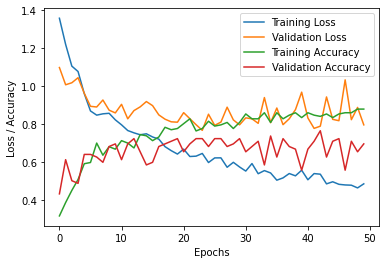

18/18 [==============================] - 4s 241ms/step - loss: 0.8037 - accuracy: 0.7083
Test loss: 0.8037338852882385
Test accuracy: 0.7083333134651184


In [39]:
L2R = 0.01;LR = 0.001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.01   - learning_rate = 0.0001  - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
19/19 [==============================] - 13s 682ms/step - loss: 1.2916 - accuracy: 0.3581 - val_loss: 1.2895 - val_accuracy: 0.2639
Epoch 2/100
19/19 [==============================] - 13s 673ms/step - loss: 1.2333 - accuracy: 0.3176 - val_loss: 1.2592 - val_accuracy: 0.2917
Epoch 3/100
19/19 [==============================] - 13s 673ms/step - loss: 1.1984 - accuracy: 0.3446 - val_loss: 1.2581 - val_accuracy: 0.2361
Epoch 4/100
19/19 [==============================] - 13s 670ms/step - loss: 1.2229 - accuracy: 0.2838 - val_loss: 1.2487 - val_accuracy: 0.2639
Epoch 5/100
19/19 [==============================] - 13s 674ms/step - loss: 1.2121 - accuracy: 0.2905 - val_loss: 1.2442 - val_accuracy: 0.2778
Epoch 6/100
19/19 [==============================] - 13s 670ms/step - loss: 1.1972 - accuracy: 0.3514 - val_loss: 1.2362 - val_accuracy: 0.3194
Epoch 7/100
19/

Epoch 57/100
19/19 [==============================] - 13s 669ms/step - loss: 0.9826 - accuracy: 0.6419 - val_loss: 1.0457 - val_accuracy: 0.5417
Epoch 58/100
19/19 [==============================] - 13s 670ms/step - loss: 0.9876 - accuracy: 0.5946 - val_loss: 1.0580 - val_accuracy: 0.5278
Epoch 59/100
19/19 [==============================] - 13s 669ms/step - loss: 0.9746 - accuracy: 0.6419 - val_loss: 1.0643 - val_accuracy: 0.5417
Epoch 60/100
19/19 [==============================] - 13s 671ms/step - loss: 0.9748 - accuracy: 0.6419 - val_loss: 1.0520 - val_accuracy: 0.5833
Epoch 61/100
19/19 [==============================] - 13s 680ms/step - loss: 0.9855 - accuracy: 0.5987 - val_loss: 1.0468 - val_accuracy: 0.5833
Epoch 62/100
19/19 [==============================] - 13s 671ms/step - loss: 0.9729 - accuracy: 0.6486 - val_loss: 1.0233 - val_accuracy: 0.5833
Epoch 63/100
19/19 [==============================] - 13s 681ms/step - loss: 0.9689 - accuracy: 0.6216 - val_loss: 1.0496 - val_ac

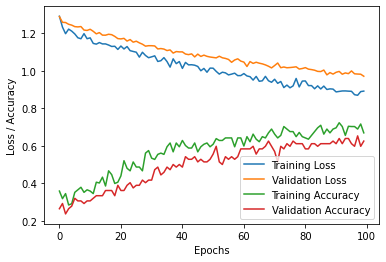

9/9 [==============================] - 4s 450ms/step - loss: 0.9252 - accuracy: 0.5833
Test loss: 0.9252185821533203
Test accuracy: 0.5833333134651184


In [38]:
L2R = 0.01;LR = 0.0001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.01   - learning_rate = 0.0001  - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
39/39 [==============================] - 14s 352ms/step - loss: 1.1941 - accuracy: 0.3590 - val_loss: 1.2379 - val_accuracy: 0.3333
Epoch 2/100
39/39 [==============================] - 14s 350ms/step - loss: 1.1832 - accuracy: 0.3333 - val_loss: 1.2312 - val_accuracy: 0.3194
Epoch 3/100
39/39 [==============================] - 14s 349ms/step - loss: 1.1639 - accuracy: 0.3974 - val_loss: 1.2213 - val_accuracy: 0.3194
Epoch 4/100
39/39 [==============================] - 14s 350ms/step - loss: 1.1549 - accuracy: 0.3974 - val_loss: 1.2078 - val_accuracy: 0.3194
Epoch 5/100
39/39 [==============================] - 14s 350ms/step - loss: 1.1389 - accuracy: 0.3782 - val_loss: 1.2149 - val_accuracy: 0.3056
Epoch 6/100
39/39 [==============================] - 14s 349ms/step - loss: 1.1306 - accuracy: 0.4295 - val_loss: 1.1995 - val_accuracy: 0.3333
Epoch 7/100
39/

Epoch 57/100
39/39 [==============================] - 14s 350ms/step - loss: 0.8320 - accuracy: 0.7244 - val_loss: 0.9668 - val_accuracy: 0.5972
Epoch 58/100
39/39 [==============================] - 14s 349ms/step - loss: 0.8006 - accuracy: 0.7756 - val_loss: 0.9618 - val_accuracy: 0.5694
Epoch 59/100
39/39 [==============================] - 14s 350ms/step - loss: 0.8402 - accuracy: 0.7308 - val_loss: 0.9529 - val_accuracy: 0.5972
Epoch 60/100
39/39 [==============================] - 14s 349ms/step - loss: 0.8250 - accuracy: 0.7436 - val_loss: 0.9328 - val_accuracy: 0.6250
Epoch 61/100
39/39 [==============================] - 14s 354ms/step - loss: 0.8127 - accuracy: 0.7821 - val_loss: 0.9499 - val_accuracy: 0.5972
Epoch 62/100
39/39 [==============================] - 14s 349ms/step - loss: 0.8200 - accuracy: 0.7436 - val_loss: 0.9461 - val_accuracy: 0.5972
Epoch 63/100
39/39 [==============================] - 14s 350ms/step - loss: 0.8359 - accuracy: 0.7244 - val_loss: 0.9085 - val_ac

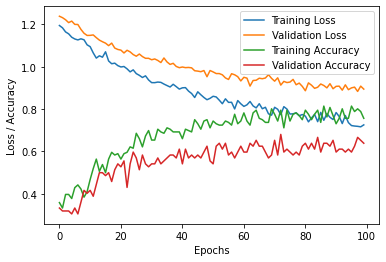

18/18 [==============================] - 4s 235ms/step - loss: 0.8565 - accuracy: 0.6667
Test loss: 0.8564691543579102
Test accuracy: 0.6666666865348816


In [37]:
L2R = 0.01;LR = 0.0001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.01   - learning_rate = 0.00001 - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
19/19 [==============================] - 13s 675ms/step - loss: 1.2434 - accuracy: 0.3243 - val_loss: 1.3083 - val_accuracy: 0.2361
Epoch 2/150
19/19 [==============================] - 12s 660ms/step - loss: 1.2331 - accuracy: 0.3108 - val_loss: 1.3035 - val_accuracy: 0.2361
Epoch 3/150
19/19 [==============================] - 12s 660ms/step - loss: 1.2455 - accuracy: 0.2905 - val_loss: 1.2859 - val_accuracy: 0.2222
Epoch 4/150
19/19 [==============================] - 12s 674ms/step - loss: 1.2258 - accuracy: 0.3176 - val_loss: 1.2880 - val_accuracy: 0.2361
Epoch 5/150
19/19 [==============================] - 12s 661ms/step - loss: 1.2300 - accuracy: 0.2973 - val_loss: 1.2845 - val_accuracy: 0.2500
Epoch 6/150
19/19 [==============================] - 12s 661ms/step - loss: 1.2292 - accuracy: 0.2432 - val_loss: 1.2603 - val_accuracy: 0.2778
Epoch 7/150
19/

Epoch 57/150
19/19 [==============================] - 12s 646ms/step - loss: 1.1748 - accuracy: 0.3311 - val_loss: 1.2257 - val_accuracy: 0.3056
Epoch 58/150
19/19 [==============================] - 12s 652ms/step - loss: 1.1820 - accuracy: 0.3581 - val_loss: 1.2232 - val_accuracy: 0.3194
Epoch 59/150
19/19 [==============================] - 12s 647ms/step - loss: 1.1570 - accuracy: 0.3919 - val_loss: 1.2264 - val_accuracy: 0.3194
Epoch 60/150
19/19 [==============================] - 12s 644ms/step - loss: 1.1863 - accuracy: 0.3311 - val_loss: 1.2291 - val_accuracy: 0.2778
Epoch 61/150
19/19 [==============================] - 12s 648ms/step - loss: 1.1575 - accuracy: 0.3851 - val_loss: 1.2264 - val_accuracy: 0.3056
Epoch 62/150
19/19 [==============================] - 12s 647ms/step - loss: 1.1715 - accuracy: 0.3041 - val_loss: 1.2240 - val_accuracy: 0.3056
Epoch 63/150
19/19 [==============================] - 12s 642ms/step - loss: 1.1514 - accuracy: 0.4054 - val_loss: 1.2216 - val_ac

19/19 [==============================] - 12s 656ms/step - loss: 1.1418 - accuracy: 0.3784 - val_loss: 1.1903 - val_accuracy: 0.3333
Epoch 114/150
19/19 [==============================] - 12s 668ms/step - loss: 1.1599 - accuracy: 0.3784 - val_loss: 1.1967 - val_accuracy: 0.3194
Epoch 115/150
19/19 [==============================] - 12s 656ms/step - loss: 1.1580 - accuracy: 0.3514 - val_loss: 1.2000 - val_accuracy: 0.3194
Epoch 116/150
19/19 [==============================] - 12s 655ms/step - loss: 1.1400 - accuracy: 0.3986 - val_loss: 1.1867 - val_accuracy: 0.3333
Epoch 117/150
19/19 [==============================] - 12s 658ms/step - loss: 1.1522 - accuracy: 0.4189 - val_loss: 1.1992 - val_accuracy: 0.3194
Epoch 118/150
19/19 [==============================] - 12s 655ms/step - loss: 1.1736 - accuracy: 0.3581 - val_loss: 1.1909 - val_accuracy: 0.3194
Epoch 119/150
19/19 [==============================] - 12s 657ms/step - loss: 1.1547 - accuracy: 0.4054 - val_loss: 1.1961 - val_accuracy:

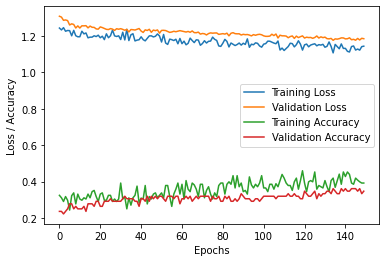

9/9 [==============================] - 4s 442ms/step - loss: 1.1244 - accuracy: 0.4722
Test loss: 1.1243683099746704
Test accuracy: 0.4722222089767456


In [36]:
L2R = 0.01;LR = 0.00001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.01   - learning_rate = 0.00001 - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
39/39 [==============================] - 15s 380ms/step - loss: 1.2206 - accuracy: 0.3718 - val_loss: 1.2395 - val_accuracy: 0.3611
Epoch 2/150
39/39 [==============================] - 14s 357ms/step - loss: 1.1838 - accuracy: 0.3654 - val_loss: 1.2202 - val_accuracy: 0.3333
Epoch 3/150
39/39 [==============================] - 13s 344ms/step - loss: 1.1822 - accuracy: 0.3269 - val_loss: 1.2062 - val_accuracy: 0.2917
Epoch 4/150
39/39 [==============================] - 14s 371ms/step - loss: 1.1941 - accuracy: 0.3269 - val_loss: 1.1823 - val_accuracy: 0.3056
Epoch 5/150
39/39 [==============================] - 14s 358ms/step - loss: 1.1743 - accuracy: 0.3397 - val_loss: 1.1747 - val_accuracy: 0.3333
Epoch 6/150
39/39 [==============================] - 14s 354ms/step - loss: 1.1510 - accuracy: 0.3846 - val_loss: 1.1861 - val_accuracy: 0.2778
Epoch 7/150
39/

Epoch 57/150
39/39 [==============================] - 13s 337ms/step - loss: 1.1019 - accuracy: 0.4744 - val_loss: 1.1216 - val_accuracy: 0.4306
Epoch 58/150
39/39 [==============================] - 13s 340ms/step - loss: 1.0979 - accuracy: 0.4423 - val_loss: 1.1339 - val_accuracy: 0.4028
Epoch 59/150
39/39 [==============================] - 13s 338ms/step - loss: 1.0877 - accuracy: 0.4808 - val_loss: 1.1265 - val_accuracy: 0.4167
Epoch 60/150
39/39 [==============================] - 13s 337ms/step - loss: 1.0992 - accuracy: 0.5064 - val_loss: 1.1236 - val_accuracy: 0.4167
Epoch 61/150
39/39 [==============================] - 13s 338ms/step - loss: 1.0966 - accuracy: 0.4872 - val_loss: 1.1213 - val_accuracy: 0.4306
Epoch 62/150
39/39 [==============================] - 13s 341ms/step - loss: 1.0993 - accuracy: 0.4295 - val_loss: 1.1162 - val_accuracy: 0.4167
Epoch 63/150
39/39 [==============================] - 13s 345ms/step - loss: 1.1126 - accuracy: 0.4231 - val_loss: 1.1139 - val_ac

39/39 [==============================] - 13s 343ms/step - loss: 1.0548 - accuracy: 0.5000 - val_loss: 1.0979 - val_accuracy: 0.4444
Epoch 114/150
39/39 [==============================] - 13s 342ms/step - loss: 1.0639 - accuracy: 0.5064 - val_loss: 1.0840 - val_accuracy: 0.4583
Epoch 115/150
39/39 [==============================] - 13s 345ms/step - loss: 1.0552 - accuracy: 0.5000 - val_loss: 1.0816 - val_accuracy: 0.4583
Epoch 116/150
39/39 [==============================] - 13s 345ms/step - loss: 1.0611 - accuracy: 0.5321 - val_loss: 1.0835 - val_accuracy: 0.4583
Epoch 117/150
39/39 [==============================] - 13s 344ms/step - loss: 1.0502 - accuracy: 0.5256 - val_loss: 1.0775 - val_accuracy: 0.4722
Epoch 118/150
39/39 [==============================] - 13s 344ms/step - loss: 1.0574 - accuracy: 0.5385 - val_loss: 1.0805 - val_accuracy: 0.4583
Epoch 119/150
39/39 [==============================] - 13s 343ms/step - loss: 1.0633 - accuracy: 0.5256 - val_loss: 1.0707 - val_accuracy:

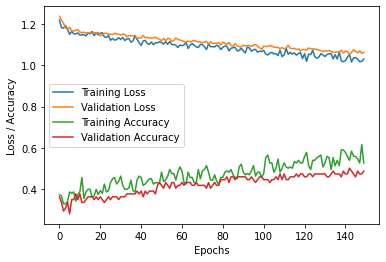

18/18 [==============================] - 4s 231ms/step - loss: 1.0302 - accuracy: 0.5417
Test loss: 1.0302176475524902
Test accuracy: 0.5416666865348816


In [35]:
L2R = 0.01;LR = 0.00001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.001   - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
19/19 [==============================] - 13s 662ms/step - loss: 1.2225 - accuracy: 0.3649 - val_loss: 1.0552 - val_accuracy: 0.4306
Epoch 2/50
19/19 [==============================] - 13s 703ms/step - loss: 1.1225 - accuracy: 0.3716 - val_loss: 1.2524 - val_accuracy: 0.2917
Epoch 3/50
19/19 [==============================] - 14s 744ms/step - loss: 1.0817 - accuracy: 0.4054 - val_loss: 1.0085 - val_accuracy: 0.4861
Epoch 4/50
19/19 [==============================] - 12s 655ms/step - loss: 1.0997 - accuracy: 0.4054 - val_loss: 0.9891 - val_accuracy: 0.5417
Epoch 5/50
19/19 [==============================] - 12s 665ms/step - loss: 1.0183 - accuracy: 0.5541 - val_loss: 1.0981 - val_accuracy: 0.4444
Epoch 6/50
19/19 [==============================] - 12s 665ms/step - loss: 0.9990 - accuracy: 0.5000 - val_loss: 0.9271 - val_accuracy: 0.5972
Epoch 7/50
19/19 [===

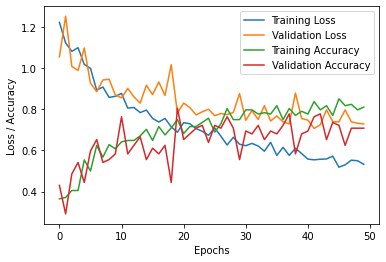

9/9 [==============================] - 4s 449ms/step - loss: 0.7512 - accuracy: 0.6944
Test loss: 0.7512189149856567
Test accuracy: 0.6944444179534912


In [34]:
L2R = 0.001;LR = 0.001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.001   - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/50
39/39 [==============================] - 14s 343ms/step - loss: 1.2443 - accuracy: 0.3269 - val_loss: 1.1323 - val_accuracy: 0.4028
Epoch 2/50
39/39 [==============================] - 13s 342ms/step - loss: 1.1717 - accuracy: 0.4103 - val_loss: 1.0496 - val_accuracy: 0.4167
Epoch 3/50
39/39 [==============================] - 13s 342ms/step - loss: 1.0281 - accuracy: 0.4808 - val_loss: 1.0179 - val_accuracy: 0.4722
Epoch 4/50
39/39 [==============================] - 13s 341ms/step - loss: 0.9397 - accuracy: 0.5897 - val_loss: 1.0130 - val_accuracy: 0.5972
Epoch 5/50
39/39 [==============================] - 13s 341ms/step - loss: 0.9351 - accuracy: 0.5449 - val_loss: 0.9921 - val_accuracy: 0.5417
Epoch 6/50
39/39 [==============================] - 13s 344ms/step - loss: 0.8845 - accuracy: 0.6090 - val_loss: 0.8580 - val_accuracy: 0.6667
Epoch 7/50
39/39 [===

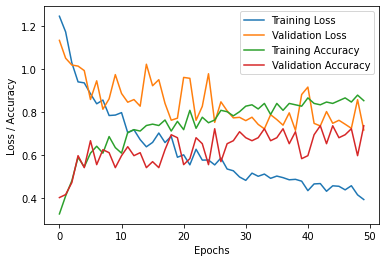

18/18 [==============================] - 4s 229ms/step - loss: 0.7609 - accuracy: 0.7222
Test loss: 0.7608861923217773
Test accuracy: 0.7222222089767456


In [33]:
L2R = 0.001;LR = 0.001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.0001  - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
19/19 [==============================] - 13s 666ms/step - loss: 1.1499 - accuracy: 0.2905 - val_loss: 1.1286 - val_accuracy: 0.3056
Epoch 2/100
19/19 [==============================] - 12s 654ms/step - loss: 1.1463 - accuracy: 0.2838 - val_loss: 1.1222 - val_accuracy: 0.3472
Epoch 3/100
19/19 [==============================] - 12s 658ms/step - loss: 1.1495 - accuracy: 0.3243 - val_loss: 1.1201 - val_accuracy: 0.3056
Epoch 4/100
19/19 [==============================] - 12s 657ms/step - loss: 1.1174 - accuracy: 0.3851 - val_loss: 1.1121 - val_accuracy: 0.3333
Epoch 5/100
19/19 [==============================] - 12s 658ms/step - loss: 1.1191 - accuracy: 0.3851 - val_loss: 1.1064 - val_accuracy: 0.3889
Epoch 6/100
19/19 [==============================] - 12s 664ms/step - loss: 1.1083 - accuracy: 0.3716 - val_loss: 1.0939 - val_accuracy: 0.3750
Epoch 7/100
19/

Epoch 57/100
19/19 [==============================] - 12s 656ms/step - loss: 0.9292 - accuracy: 0.6284 - val_loss: 0.9507 - val_accuracy: 0.5694
Epoch 58/100
19/19 [==============================] - 12s 656ms/step - loss: 0.9163 - accuracy: 0.6351 - val_loss: 0.9515 - val_accuracy: 0.6111
Epoch 59/100
19/19 [==============================] - 12s 657ms/step - loss: 0.9086 - accuracy: 0.6149 - val_loss: 0.9560 - val_accuracy: 0.5833
Epoch 60/100
19/19 [==============================] - 12s 656ms/step - loss: 0.9095 - accuracy: 0.6149 - val_loss: 0.9562 - val_accuracy: 0.5417
Epoch 61/100
19/19 [==============================] - 12s 656ms/step - loss: 0.9067 - accuracy: 0.6419 - val_loss: 0.9593 - val_accuracy: 0.5556
Epoch 62/100
19/19 [==============================] - 12s 657ms/step - loss: 0.8708 - accuracy: 0.6892 - val_loss: 0.9506 - val_accuracy: 0.5278
Epoch 63/100
19/19 [==============================] - 12s 660ms/step - loss: 0.8902 - accuracy: 0.6351 - val_loss: 0.9526 - val_ac

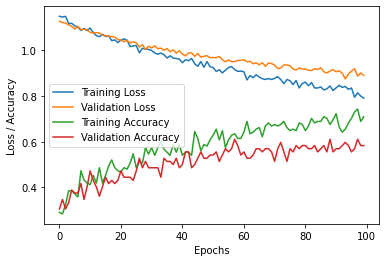

9/9 [==============================] - 4s 441ms/step - loss: 0.8681 - accuracy: 0.6111
Test loss: 0.8681330680847168
Test accuracy: 0.6111111044883728


In [32]:
L2R = 0.001;LR = 0.0001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.0001  - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/100
39/39 [==============================] - 14s 344ms/step - loss: 1.1467 - accuracy: 0.4231 - val_loss: 1.1002 - val_accuracy: 0.3611
Epoch 2/100
39/39 [==============================] - 13s 342ms/step - loss: 1.1171 - accuracy: 0.3269 - val_loss: 1.0930 - val_accuracy: 0.3889
Epoch 3/100
39/39 [==============================] - 13s 344ms/step - loss: 1.1033 - accuracy: 0.3974 - val_loss: 1.0536 - val_accuracy: 0.4028
Epoch 4/100
39/39 [==============================] - 13s 341ms/step - loss: 1.1225 - accuracy: 0.3718 - val_loss: 1.0598 - val_accuracy: 0.4306
Epoch 5/100
39/39 [==============================] - 13s 341ms/step - loss: 1.0661 - accuracy: 0.4615 - val_loss: 1.0635 - val_accuracy: 0.4306
Epoch 6/100
39/39 [==============================] - 13s 342ms/step - loss: 1.0550 - accuracy: 0.4167 - val_loss: 1.0644 - val_accuracy: 0.4306
Epoch 7/100
39/

Epoch 57/100
39/39 [==============================] - 13s 347ms/step - loss: 0.7815 - accuracy: 0.7436 - val_loss: 0.8472 - val_accuracy: 0.6944
Epoch 58/100
39/39 [==============================] - 13s 346ms/step - loss: 0.8181 - accuracy: 0.6795 - val_loss: 0.8641 - val_accuracy: 0.6667
Epoch 59/100
39/39 [==============================] - 13s 348ms/step - loss: 0.7650 - accuracy: 0.7500 - val_loss: 0.8690 - val_accuracy: 0.6111
Epoch 60/100
39/39 [==============================] - 13s 347ms/step - loss: 0.7856 - accuracy: 0.7179 - val_loss: 0.8477 - val_accuracy: 0.6667
Epoch 61/100
39/39 [==============================] - 13s 346ms/step - loss: 0.7712 - accuracy: 0.6987 - val_loss: 0.8522 - val_accuracy: 0.6528
Epoch 62/100
39/39 [==============================] - 13s 347ms/step - loss: 0.7830 - accuracy: 0.7372 - val_loss: 0.8539 - val_accuracy: 0.6389
Epoch 63/100
39/39 [==============================] - 13s 347ms/step - loss: 0.7434 - accuracy: 0.7564 - val_loss: 0.8433 - val_ac

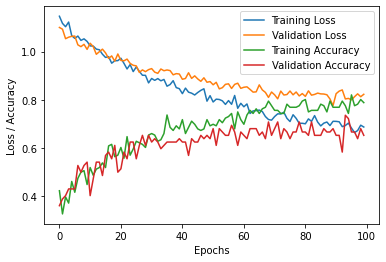

18/18 [==============================] - 4s 230ms/step - loss: 0.7703 - accuracy: 0.6806
Test loss: 0.7703498601913452
Test accuracy: 0.6805555820465088


In [31]:
L2R = 0.001;LR = 0.0001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.00001 - batch_size = 8

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
19/19 [==============================] - 13s 668ms/step - loss: 1.1646 - accuracy: 0.3716 - val_loss: 1.1739 - val_accuracy: 0.3472
Epoch 2/150
19/19 [==============================] - 12s 676ms/step - loss: 1.1237 - accuracy: 0.4054 - val_loss: 1.1610 - val_accuracy: 0.3194
Epoch 3/150
19/19 [==============================] - 12s 664ms/step - loss: 1.1089 - accuracy: 0.3986 - val_loss: 1.1449 - val_accuracy: 0.3194
Epoch 4/150
19/19 [==============================] - 12s 663ms/step - loss: 1.1288 - accuracy: 0.4122 - val_loss: 1.1337 - val_accuracy: 0.2917
Epoch 5/150
19/19 [==============================] - 12s 664ms/step - loss: 1.0884 - accuracy: 0.4122 - val_loss: 1.1220 - val_accuracy: 0.3056
Epoch 6/150
19/19 [==============================] - 12s 663ms/step - loss: 1.1037 - accuracy: 0.4054 - val_loss: 1.1230 - val_accuracy: 0.2917
Epoch 7/150
19/

Epoch 57/150
19/19 [==============================] - 12s 663ms/step - loss: 1.0597 - accuracy: 0.4189 - val_loss: 1.0565 - val_accuracy: 0.4722
Epoch 58/150
19/19 [==============================] - 12s 666ms/step - loss: 1.0805 - accuracy: 0.4122 - val_loss: 1.0708 - val_accuracy: 0.4444
Epoch 59/150
19/19 [==============================] - 12s 661ms/step - loss: 1.0561 - accuracy: 0.4392 - val_loss: 1.0588 - val_accuracy: 0.4722
Epoch 60/150
19/19 [==============================] - 12s 662ms/step - loss: 1.0715 - accuracy: 0.4054 - val_loss: 1.0553 - val_accuracy: 0.4722
Epoch 61/150
19/19 [==============================] - 13s 675ms/step - loss: 1.0698 - accuracy: 0.3684 - val_loss: 1.0691 - val_accuracy: 0.4444
Epoch 62/150
19/19 [==============================] - 12s 662ms/step - loss: 1.0421 - accuracy: 0.4932 - val_loss: 1.0597 - val_accuracy: 0.4444
Epoch 63/150
19/19 [==============================] - 12s 662ms/step - loss: 1.0576 - accuracy: 0.4459 - val_loss: 1.0671 - val_ac

19/19 [==============================] - 13s 669ms/step - loss: 1.0525 - accuracy: 0.4257 - val_loss: 1.0441 - val_accuracy: 0.5000
Epoch 114/150
19/19 [==============================] - 12s 666ms/step - loss: 1.0184 - accuracy: 0.4797 - val_loss: 1.0380 - val_accuracy: 0.5139
Epoch 115/150
19/19 [==============================] - 12s 666ms/step - loss: 1.0345 - accuracy: 0.4324 - val_loss: 1.0468 - val_accuracy: 0.5139
Epoch 116/150
19/19 [==============================] - 12s 665ms/step - loss: 1.0397 - accuracy: 0.4662 - val_loss: 1.0421 - val_accuracy: 0.5139
Epoch 117/150
19/19 [==============================] - 12s 665ms/step - loss: 1.0317 - accuracy: 0.4662 - val_loss: 1.0493 - val_accuracy: 0.4722
Epoch 118/150
19/19 [==============================] - 12s 664ms/step - loss: 1.0387 - accuracy: 0.4595 - val_loss: 1.0437 - val_accuracy: 0.4722
Epoch 119/150
19/19 [==============================] - 13s 671ms/step - loss: 1.0213 - accuracy: 0.4527 - val_loss: 1.0387 - val_accuracy:

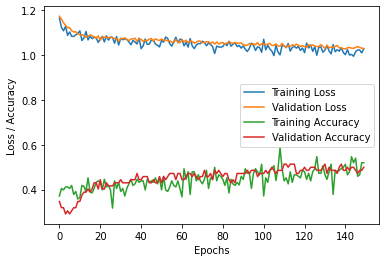

9/9 [==============================] - 4s 443ms/step - loss: 1.0195 - accuracy: 0.5278
Test loss: 1.019536018371582
Test accuracy: 0.5277777910232544


In [30]:
L2R = 0.001;LR = 0.00001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# VGG16 - l2 = 0.001  - learning_rate = 0.00001 - batch_size = 4

Found 156 images belonging to 3 classes.
Found 74 images belonging to 3 classes.
Found 73 images belonging to 3 classes.
Epoch 1/150
39/39 [==============================] - 14s 342ms/step - loss: 1.4720 - accuracy: 0.3205 - val_loss: 1.2879 - val_accuracy: 0.3194
Epoch 2/150
39/39 [==============================] - 14s 370ms/step - loss: 1.3136 - accuracy: 0.3141 - val_loss: 1.1750 - val_accuracy: 0.3750
Epoch 3/150
39/39 [==============================] - 15s 382ms/step - loss: 1.2518 - accuracy: 0.2756 - val_loss: 1.1479 - val_accuracy: 0.3611
Epoch 4/150
39/39 [==============================] - 15s 386ms/step - loss: 1.2034 - accuracy: 0.3141 - val_loss: 1.1282 - val_accuracy: 0.3611
Epoch 5/150
39/39 [==============================] - 15s 389ms/step - loss: 1.1961 - accuracy: 0.2628 - val_loss: 1.1310 - val_accuracy: 0.3472
Epoch 6/150
39/39 [==============================] - 14s 356ms/step - loss: 1.1849 - accuracy: 0.2500 - val_loss: 1.1200 - val_accuracy: 0.3750
Epoch 7/150
39/

Epoch 57/150
39/39 [==============================] - 14s 356ms/step - loss: 1.0987 - accuracy: 0.3590 - val_loss: 1.0751 - val_accuracy: 0.4722
Epoch 58/150
39/39 [==============================] - 14s 353ms/step - loss: 1.1032 - accuracy: 0.3846 - val_loss: 1.0876 - val_accuracy: 0.4861
Epoch 59/150
39/39 [==============================] - 14s 355ms/step - loss: 1.1054 - accuracy: 0.3397 - val_loss: 1.0823 - val_accuracy: 0.4722
Epoch 60/150
39/39 [==============================] - 14s 355ms/step - loss: 1.0812 - accuracy: 0.4231 - val_loss: 1.0787 - val_accuracy: 0.4722
Epoch 61/150
39/39 [==============================] - 14s 356ms/step - loss: 1.0908 - accuracy: 0.3846 - val_loss: 1.0728 - val_accuracy: 0.4722
Epoch 62/150
39/39 [==============================] - 14s 357ms/step - loss: 1.0928 - accuracy: 0.3718 - val_loss: 1.0853 - val_accuracy: 0.4583
Epoch 63/150
39/39 [==============================] - 14s 355ms/step - loss: 1.0824 - accuracy: 0.4231 - val_loss: 1.0768 - val_ac

39/39 [==============================] - 14s 350ms/step - loss: 1.0343 - accuracy: 0.4872 - val_loss: 1.0238 - val_accuracy: 0.4861
Epoch 114/150
39/39 [==============================] - 13s 348ms/step - loss: 1.0213 - accuracy: 0.4936 - val_loss: 1.0231 - val_accuracy: 0.5139
Epoch 115/150
39/39 [==============================] - 14s 350ms/step - loss: 1.0497 - accuracy: 0.4423 - val_loss: 1.0388 - val_accuracy: 0.4722
Epoch 116/150
39/39 [==============================] - 13s 348ms/step - loss: 1.0469 - accuracy: 0.4231 - val_loss: 1.0242 - val_accuracy: 0.5000
Epoch 117/150
39/39 [==============================] - 14s 353ms/step - loss: 1.0229 - accuracy: 0.5000 - val_loss: 1.0353 - val_accuracy: 0.4861
Epoch 118/150
39/39 [==============================] - 14s 352ms/step - loss: 1.0337 - accuracy: 0.4744 - val_loss: 1.0353 - val_accuracy: 0.4861
Epoch 119/150
39/39 [==============================] - 14s 349ms/step - loss: 1.0272 - accuracy: 0.5256 - val_loss: 1.0241 - val_accuracy:

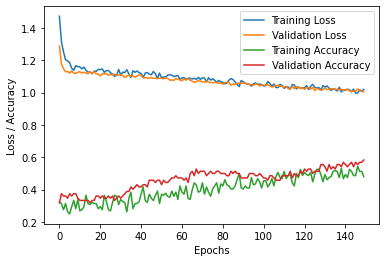

18/18 [==============================] - 4s 234ms/step - loss: 1.0339 - accuracy: 0.4722
Test loss: 1.0339106321334839
Test accuracy: 0.4722222089767456


In [29]:
L2R = 0.001;LR = 0.00001;b_size = 4

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_lab/Train'
val_dir = '../Data/SFA_lab/Validate'
test_dir = '../Data/SFA_lab/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=EPOCHS[LR],
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Images scindées

# VGG16 - l2 = 0.001 - learning_rate = 0.0001 - batch_size = 8

Found 624 images belonging to 3 classes.
Found 296 images belonging to 3 classes.
Found 292 images belonging to 3 classes.
Epoch 1/200
78/78 [==============================] - 20s 211ms/step - loss: 1.5719 - accuracy: 0.3301 - val_loss: 1.4592 - val_accuracy: 0.3953
Epoch 2/200
78/78 [==============================] - 14s 175ms/step - loss: 1.4744 - accuracy: 0.3782 - val_loss: 1.3900 - val_accuracy: 0.4054
Epoch 3/200
78/78 [==============================] - 15s 191ms/step - loss: 1.4260 - accuracy: 0.3686 - val_loss: 1.3185 - val_accuracy: 0.4493
Epoch 4/200
78/78 [==============================] - 15s 191ms/step - loss: 1.2810 - accuracy: 0.4439 - val_loss: 1.3186 - val_accuracy: 0.4459
Epoch 5/200
78/78 [==============================] - 15s 192ms/step - loss: 1.2120 - accuracy: 0.4567 - val_loss: 1.2688 - val_accuracy: 0.4628
Epoch 6/200
78/78 [==============================] - 15s 192ms/step - loss: 1.2162 - accuracy: 0.4840 - val_loss: 1.2367 - val_accuracy: 0.4966
Epoch 7/200
7

Epoch 57/200
78/78 [==============================] - 15s 192ms/step - loss: 0.6614 - accuracy: 0.7340 - val_loss: 1.0538 - val_accuracy: 0.5574
Epoch 58/200
78/78 [==============================] - 15s 193ms/step - loss: 0.6306 - accuracy: 0.7516 - val_loss: 1.0476 - val_accuracy: 0.5676
Epoch 59/200
78/78 [==============================] - 15s 194ms/step - loss: 0.6286 - accuracy: 0.7532 - val_loss: 1.0542 - val_accuracy: 0.5608
Epoch 60/200
78/78 [==============================] - 15s 191ms/step - loss: 0.6380 - accuracy: 0.7292 - val_loss: 1.0424 - val_accuracy: 0.5642
Epoch 61/200
78/78 [==============================] - 15s 191ms/step - loss: 0.6552 - accuracy: 0.7244 - val_loss: 1.0444 - val_accuracy: 0.5642
Epoch 62/200
78/78 [==============================] - 15s 191ms/step - loss: 0.6051 - accuracy: 0.7468 - val_loss: 1.0764 - val_accuracy: 0.5473
Epoch 63/200
78/78 [==============================] - 15s 191ms/step - loss: 0.6216 - accuracy: 0.7372 - val_loss: 1.0593 - val_ac

78/78 [==============================] - 15s 191ms/step - loss: 0.5129 - accuracy: 0.7965 - val_loss: 1.0487 - val_accuracy: 0.5608
Epoch 114/200
78/78 [==============================] - 15s 191ms/step - loss: 0.5055 - accuracy: 0.8093 - val_loss: 1.0595 - val_accuracy: 0.5743
Epoch 115/200
78/78 [==============================] - 15s 191ms/step - loss: 0.4982 - accuracy: 0.7885 - val_loss: 1.0544 - val_accuracy: 0.5642
Epoch 116/200
78/78 [==============================] - 15s 191ms/step - loss: 0.5340 - accuracy: 0.7885 - val_loss: 1.0529 - val_accuracy: 0.5811
Epoch 117/200
78/78 [==============================] - 15s 196ms/step - loss: 0.5099 - accuracy: 0.8189 - val_loss: 1.0571 - val_accuracy: 0.5676
Epoch 118/200
78/78 [==============================] - 15s 191ms/step - loss: 0.5111 - accuracy: 0.8061 - val_loss: 1.0571 - val_accuracy: 0.5642
Epoch 119/200
78/78 [==============================] - 15s 192ms/step - loss: 0.5107 - accuracy: 0.8125 - val_loss: 1.0687 - val_accuracy:

78/78 [==============================] - 15s 192ms/step - loss: 0.4790 - accuracy: 0.8125 - val_loss: 1.0657 - val_accuracy: 0.5743
Epoch 170/200
78/78 [==============================] - 15s 191ms/step - loss: 0.4904 - accuracy: 0.8109 - val_loss: 1.0620 - val_accuracy: 0.5642
Epoch 171/200
78/78 [==============================] - 16s 199ms/step - loss: 0.4484 - accuracy: 0.8333 - val_loss: 1.0615 - val_accuracy: 0.5811
Epoch 172/200
78/78 [==============================] - 15s 192ms/step - loss: 0.4780 - accuracy: 0.8237 - val_loss: 1.0527 - val_accuracy: 0.5777
Epoch 173/200
78/78 [==============================] - 15s 192ms/step - loss: 0.4377 - accuracy: 0.8429 - val_loss: 1.0613 - val_accuracy: 0.5811
Epoch 174/200
78/78 [==============================] - 15s 192ms/step - loss: 0.4189 - accuracy: 0.8542 - val_loss: 1.0729 - val_accuracy: 0.5845
Epoch 175/200
78/78 [==============================] - 15s 192ms/step - loss: 0.4136 - accuracy: 0.8494 - val_loss: 1.0638 - val_accuracy:

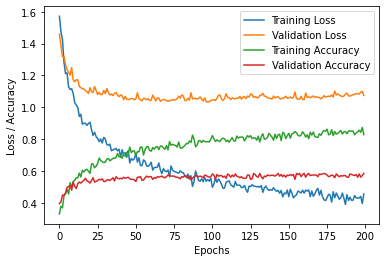

36/36 [==============================] - 5s 136ms/step - loss: 1.1870 - accuracy: 0.5417
Test loss: 1.1870402097702026
Test accuracy: 0.5416666865348816


In [42]:
L2R = 0.001;LR = 0.0001;b_size = 8

# Charger l'architecture en mémoire et la rendre non-trainable
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(Size, Size, 3))
for layer in base_model.layers:
    layer.trainable = False
# Creer le modèle avec InceptionV3 comme base
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(L2R)))
# Compiler le modèle
model.compile(optimizer=SGD(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation et preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = '../Data/SFA_labCut/Train'
val_dir = '../Data/SFA_labCut/Validation'
test_dir = '../Data/SFA_labCut/Test'

batch_size = b_size

#Génerateurs de data
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,target_size=(Size, Size),batch_size=batch_size,class_mode='categorical',shuffle=False
)

# Entrainer le modèle
history = model.fit(
    train_generator,steps_per_epoch=train_generator.n // batch_size,
    epochs=200,
    validation_data=validation_generator,validation_steps=validation_generator.n // batch_size
)

# Tracer la courbe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Evaluation sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)